# Loan Interest Rate Prediction

## Importing Our Tools

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

from xgboost import XGBRegressor

## Load and View Data

In [3]:
data = pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
len(data)

9578

In [4]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [5]:
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [10]:
zero=data[data['credit.policy']==0]
zero.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7710,0,debt_consolidation,0.1608,35.20,10.308953,23.84,642,2490.000000,10125,90.4,1,0,0,0
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1
7712,0,debt_consolidation,0.1600,787.53,11.264464,19.34,682,3780.041667,15897,66.0,5,0,1,0
7713,0,educational,0.1640,126.40,10.308953,29.60,677,1643.000000,3043,58.5,1,0,0,1
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1
7715,0,debt_consolidation,0.1482,172.89,10.645425,18.51,652,4020.000000,9792,64.0,8,0,0,1
7716,0,debt_consolidation,0.1380,149.96,10.736397,16.70,662,4339.000000,314,12.6,4,1,0,0
7717,0,all_other,0.1482,311.20,11.394142,19.34,657,4139.958333,38329,77.3,0,0,0,1
7718,0,debt_consolidation,0.1703,570.69,11.355101,25.32,672,4149.958333,38781,54.5,3,0,0,0
7719,0,credit_card,0.1324,404.03,12.206073,21.31,697,5879.958333,152416,80.1,0,0,0,0


In [12]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


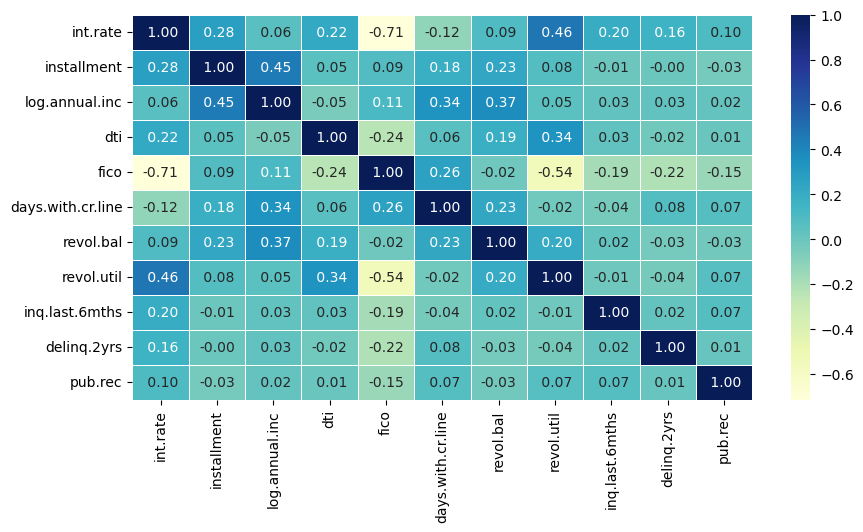

In [24]:
corr_matrix = data.iloc[:,2:-1].corr()
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt=" .2f", cmap="YlGnBu")

## 2. Modelling the Data

In [119]:
models = {'RandomForest': RandomForestRegressor(),
          'Linear Regression': LinearRegression(),
          'Ridge': Ridge(),
          'Lasso': Lasso(),
          'Gradient Boosting': GradientBoostingRegressor(),
          'XGBoost': XGBRegressor()}

In [121]:
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(models, X_train, X_test, y_train, y_test):
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        scores = {
                  'MAE': mean_absolute_error(y_test, preds),
                  'RMSLE': rmsle(y_test, preds),
                  'MSE': mean_squared_error(y_test, preds),
                  'R^2': r2_score(y_test, preds)}
        model_scores[name] = scores
    return model_scores

In [25]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [51]:
X = data.drop(['int.rate', 'credit.policy', 'revol.bal', 'installment'], axis=1)
X.head()

,purpose,log.annual.inc,dti,fico,days.with.cr.line,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,debt_consolidation,11.350407,19.48,737,5639.958333,52.1,0,0,0,0
1,credit_card,11.082143,14.29,707,2760.000000,76.7,0,0,0,0
2,debt_consolidation,10.373491,11.63,682,4710.000000,25.6,1,0,0,0
3,debt_consolidation,11.350407,8.10,712,2699.958333,73.2,1,0,0,0
4,credit_card,11.299732,14.97,667,4066.000000,39.5,0,1,0,0


In [48]:
y = data['int.rate']
y

0       0.1189
1       0.1071
2       0.1357
3       0.1008
4       0.1426
         ...  
9573    0.1461
9574    0.1253
9575    0.1071
9576    0.1600
9577    0.1392
Name: int.rate, Length: 9578, dtype: float64

In [49]:
worded_features = ['purpose']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   worded_features)],
                                   remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [122]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
scores = show_scores(models, X_train, X_test, y_train, y_test)
mae_scores={}
for name in scores:
    print(name)
    print('MAE: ', scores[name]['MAE'])
    print('RMSLE: ', scores[name]['RMSLE'])
    print('MSE: ', scores[name]['MSE'])
    print('R^2: ', scores[name]['R^2'])
    print('\n')
    mae_scores[name] = scores[name]['MAE']

RandomForest
MAE:  0.012167591336116914
RMSLE:  0.014139267224485672
MSE:  0.00025326426748903977
R^2:  0.6321111138769019


Linear Regression
MAE:  0.012961054924890886
RMSLE:  0.014898606979911787
MSE:  0.00028095682952898284
R^2:  0.5918852031956395


Ridge
MAE:  0.012960841595523001
RMSLE:  0.014898337897482088
MSE:  0.0002809472621618891
R^2:  0.5918991006477283


Lasso
MAE:  0.020832114373551203
RMSLE:  0.023209336865915038
MSE:  0.0006804792338300006
R^2:  0.011543358067865328


Gradient Boosting
MAE:  0.011754788641554182
RMSLE:  0.013610815036612656
MSE:  0.00023465762305629385
R^2:  0.6591389206919618


XGBoost
MAE:  0.012238273281524725
RMSLE:  0.01438379426797187
MSE:  0.0002623302971889597
R^2:  0.6189418989658138




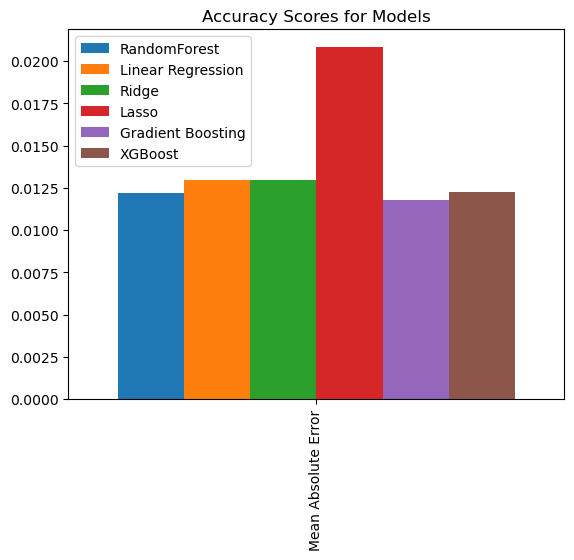

In [123]:
comparison = pd.DataFrame(mae_scores, index=["Mean Absolute Error"])
comparison.plot.bar(width=2);
plt.title("Accuracy Scores for Models");

## 3. Hypertuning Parameters

#### Tuning Random Forest

In [102]:
def show_tuned_scores(model, X_train, X_test, y_train, y_test, name):
    model_scores={}
    preds = model.predict(X_test)
    scores = {
                'MAE': mean_absolute_error(y_test, preds),
                'RMSLE': rmsle(y_test, preds),
                'MSE': mean_squared_error(y_test, preds),
                'R^2': r2_score(y_test, preds)}
    model_scores[name] = scores
    return model_scores

In [88]:
rf_params = {'n_estimators': np.arange(10,1000,50), 
             'max_depth': [None, 3, 6, 9], 
             'min_samples_split': np.arange(2,20,2),
             'min_samples_leaf': np.arange(1,20,2),
             'max_features': ['sqrt', 'log2', None], 
             'max_leaf_nodes': [3, 6, 9]}

In [91]:
np.random.seed(42)
rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=rf_params,
                               n_iter=20, cv=5, verbose=True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 6, 9],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [3, 6, 9],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [92]:
rf.best_params_

{'n_estimators': 760,
 'min_samples_split': 14,
 'min_samples_leaf': 15,
 'max_leaf_nodes': 9,
 'max_features': None,
 'max_depth': None}

In [103]:
show_tuned_scores(rf, X_train, X_test, y_train, y_test, name='Tuned Random Forest')

{'Tuned Random Forest': {'MAE': 0.013337453703729234,
  'RMSLE': 0.01523038146022146,
  'MSE': 0.0002943618906264274,
  'R^2': 0.5724131590559569}}

#### Tuning Linear Regression

In [104]:
lr_params = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

In [113]:
lr = GridSearchCV(LinearRegression(), lr_params, cv=5)
lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 5, 10, 15, None],
                         'positive': [True, False]})

In [114]:
lr.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': False}

In [115]:
show_tuned_scores(lr, X_train, X_test, y_train, y_test, name='Tuned Linear Regresssion')

{'Tuned Linear Regresssion': {'MAE': 0.012961054924910344,
  'RMSLE': 0.01489860697992129,
  'MSE': 0.0002809568295293455,
  'R^2': 0.5918852031951127}}

#### Tuning Ridge Regression

In [132]:
ridge_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]}
ridge = GridSearchCV(Ridge(), ridge_grid)
ridge.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]})

In [133]:
ridge.best_params_

{'alpha': 10}

In [134]:
scores['Ridge']

{'MAE': 0.012960841595523001,
 'RMSLE': 0.014898337897482088,
 'MSE': 0.0002809472621618891,
 'R^2': 0.5918991006477283}

In [126]:
show_tuned_scores(ridge, X_train, X_test, y_train, y_test, name='Tuned Ridge Regresssion')

{'Tuned Ridge Regresssion': {'MAE': 0.01295895642293433,
  'RMSLE': 0.01489620119996667,
  'MSE': 0.0002808720220110788,
  'R^2': 0.592008393662285}}